<a href="https://colab.research.google.com/github/Kaggle-Challenge-Group-13/Spaceship-Titanic---Group-13/blob/main/Spaceship_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance  # For feature importance analysis

# Load train and test datasets

In [ ]:
# datasets path
path = '/content/drive/MyDrive/Projects/Assignments/2024/Spaceship'

In [ ]:
# Read train data
df_train = pd.read_csv(path+'/train.csv')
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
# Read test data
df_test = pd.read_csv(path+'/test.csv')
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


# Initial data observations

In [ ]:
# Get the summary of the dataset
print("\nSummary of the dataset:")
print(df_train.info())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [ ]:
# Check for missing values on train data
print("\nMissing values in each column:")
print(df_train.isnull().sum())


Missing values in each column:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [ ]:
# Check for missing values on test data
print("\nMissing values in each column:")
print(df_test.isnull().sum())


Missing values in each column:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [ ]:
# Basic statistics of numerical columns
print("\nBasic statistics of numerical columns:")
print(df_train.describe())


Basic statistics of numerical columns:
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


In [ ]:
# Distribution of the target variable
print("\nDistribution of the target variable 'Transported':")
df_train['Transported'].value_counts()


Distribution of the target variable 'Transported':


Transported
True     4378
False    4315
Name: count, dtype: int64

In [ ]:
# Checking unique values in categorical columns
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {df_train[col].nunique()} unique values")


Unique values in categorical columns:
HomePlanet: 3 unique values
CryoSleep: 2 unique values
Cabin: 6560 unique values
Destination: 3 unique values
VIP: 2 unique values
Name: 8473 unique values


# EDA

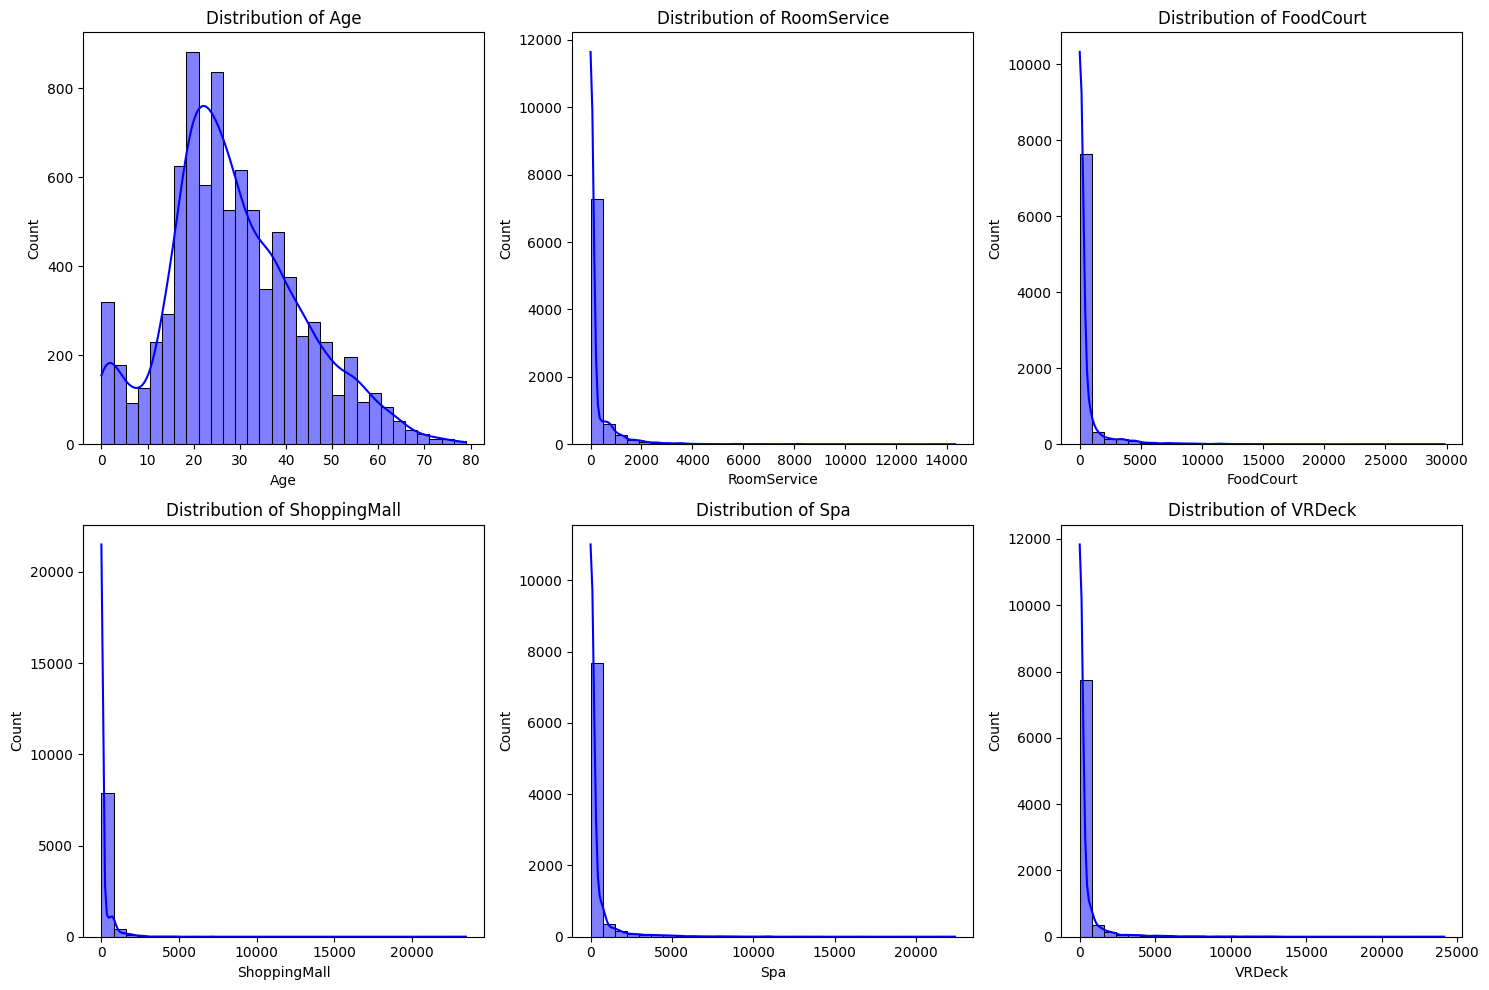

In [ ]:
# List of columns to plot
columns_to_plot = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a histogram for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_train[column], bins=30, kde=True, color='blue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

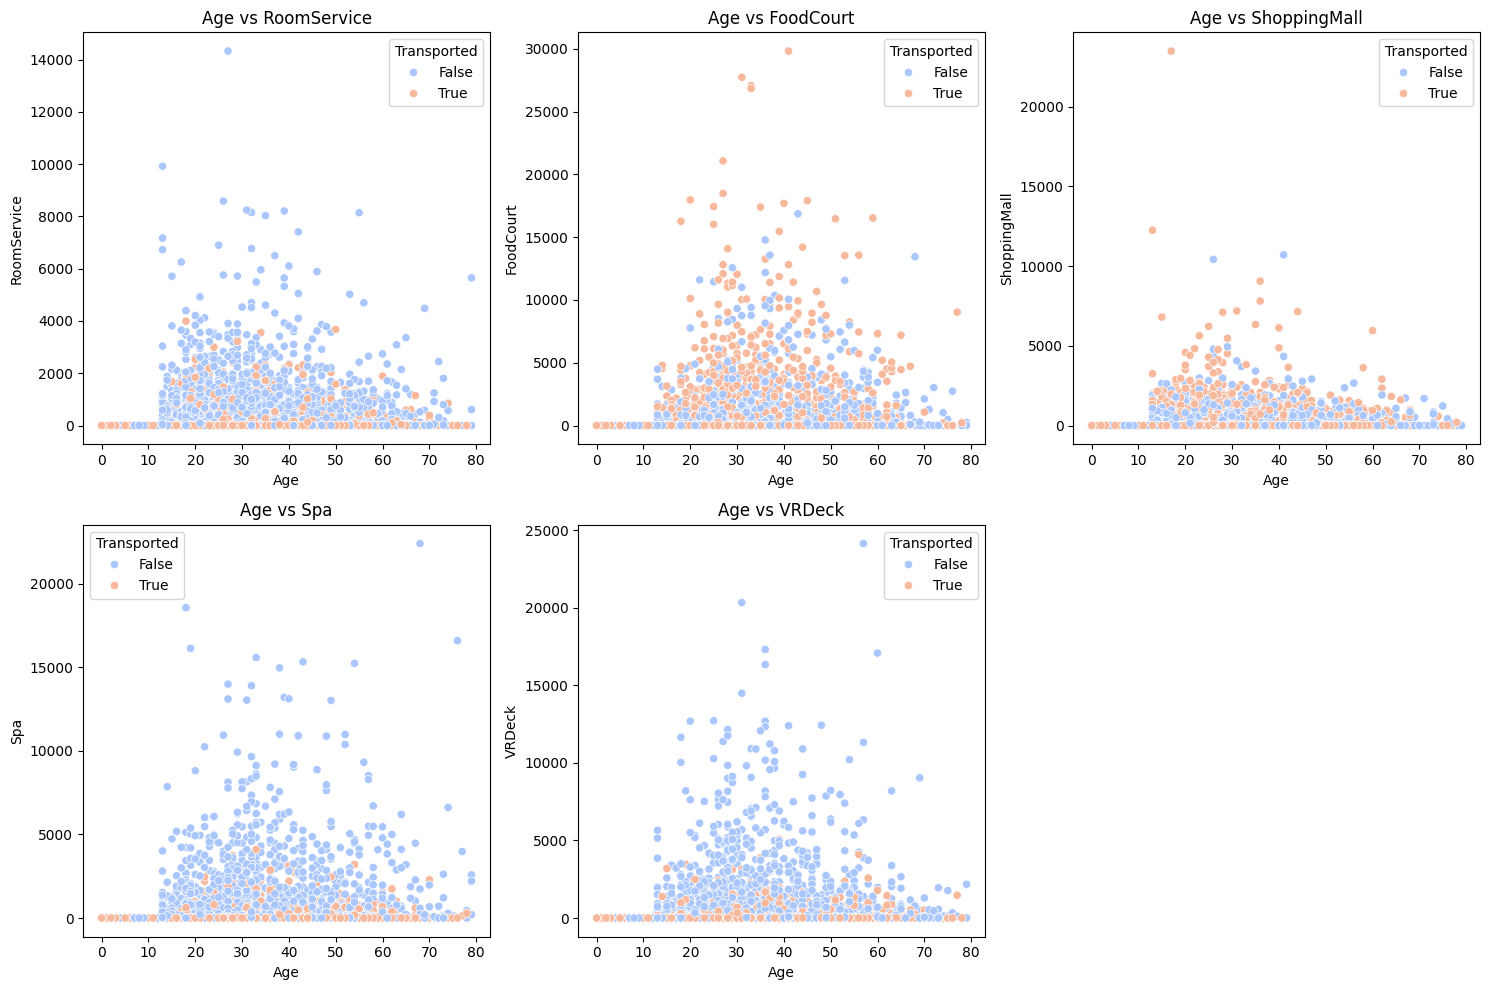

In [ ]:
# List of columns to plot against Age
columns_to_plot = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a scatter plot for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x='Age', y=column, hue='Transported', data=df_train, palette='coolwarm')
    plt.title(f'Age vs {column}')
    plt.xlabel('Age')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

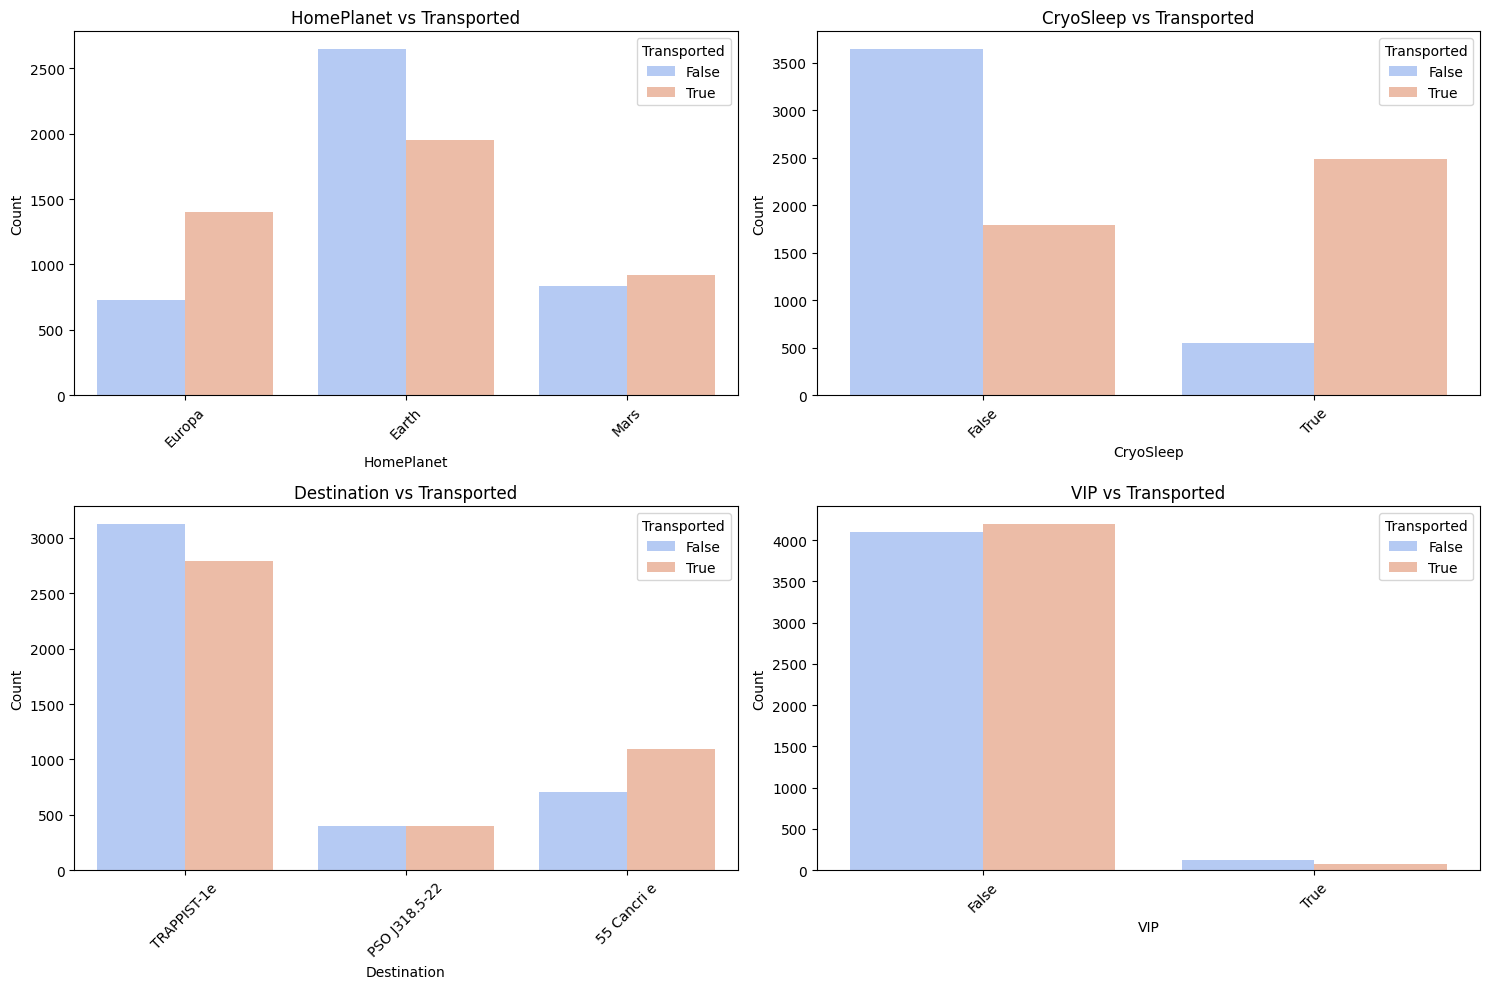

In [ ]:
# List of columns to plot
columns_to_plot = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a count plot for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=column, hue='Transported', data=df_train, palette='coolwarm')
    plt.title(f'{column} vs Transported')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Preprocessing

In [ ]:
# Dropping unnecessary columns
df_train = df_train.drop(["PassengerId", "Name", "Cabin"], axis=1)
df_test = df_test.drop(["Name", "Cabin"], axis=1)

In [ ]:
# Separate features and target variable in the training data
X_train = df_train.drop("Transported", axis=1)
y_train = df_train["Transported"]
X_test = df_test.copy()

In [ ]:
# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=["float64"]).columns
categorical_cols = X_train.select_dtypes(include=["category", "object"]).columns

In [ ]:
numerical_cols

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [ ]:
categorical_cols

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP'], dtype='object')

In [ ]:
# Preprocessing for numerical data: impute missing values with mean and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
# Preprocessing for categorical data: impute missing values with most frequent value and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Models

## Model Evaluation

In [ ]:
def evaluate_model(model_name, y_true, y_pred, dataset_type="Train"):
    """
    Print classification report and visualize confusion matrix.

    Parameters:
    - model_name: str, name of the model
    - y_true: array-like, true labels
    - y_pred: array-like, predicted labels
    - dataset_type: str, type of dataset ("Train")
    """
    # Print the classification report
    print(f"Classification Report for {model_name} ({dataset_type} Data):")
    print(classification_report(y_true, y_pred, target_names=['False', 'True']))

    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 16})

    # Add labels to the plot
    plt.title(f'Confusion Matrix for {model_name} ({dataset_type} Data)', fontsize=16)
    plt.xlabel('Predicted Transported', fontsize=14)
    plt.ylabel('Actual Transported', fontsize=14)
    plt.xticks(ticks=[0.5, 1.5], labels=['False', 'True'])
    plt.yticks(ticks=[0.5, 1.5], labels=['False', 'True'])

    plt.show()

## feature importance analysis (XAI)

In [ ]:
def plot_permutation_importance(model, X_train, y_train, df, title):
    """
    Generate a plot displaying feature importances using permutation importance technique.

    Parameters:
    model (object): Fitted machine learning model used for prediction.
    X_train (DataFrame): DataFrame containing train set features.
    y_train (array-like): True labels corresponding to train set.
    df (DataFrame): DataFrame containing feature columns.
    title (str): Title for the plot.

    Returns:
    None. Displays a horizontal bar plot showing feature importances.
    """

    # Calculate permutation importance
    perm_importance = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)

    # Get feature importances
    feature_importance = perm_importance.importances_mean

    # Get feature names
    feature_names = df.columns[:-1]  # Assuming the last column is the target variable

    # Sort feature importances
    sorted_indices = np.argsort(feature_importance)[::-1]
    sorted_features = feature_names[sorted_indices]
    sorted_importance = feature_importance[sorted_indices]

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_features)), sorted_importance, align='center')
    plt.yticks(range(len(sorted_features)), sorted_features)
    plt.xlabel('Permutation Importance')
    plt.title(title)
    plt.show()

## 1. Logistic Regression

Classification Report for LogisticRegression (Train Data):
              precision    recall  f1-score   support

       False       0.79      0.77      0.78      4315
        True       0.78      0.80      0.79      4378

    accuracy                           0.79      8693
   macro avg       0.79      0.79      0.79      8693
weighted avg       0.79      0.79      0.79      8693



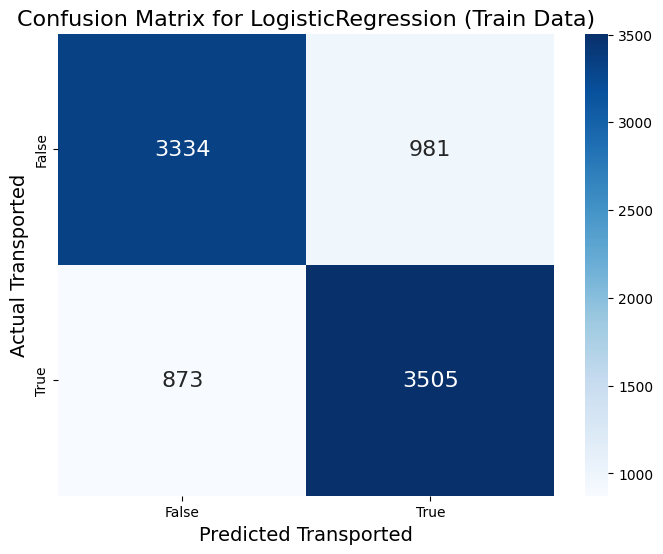

In [ ]:
# Define the model
model = LogisticRegression(max_iter=1000)

# Create a pipeline that includes preprocessing and the model
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the model on the training data
logistic_pipeline.fit(X_train, y_train)

# Predict on the training set and evaluate
lr_y_train_pred = logistic_pipeline.predict(X_train)

evaluate_model('LogisticRegression',y_train, lr_y_train_pred, )

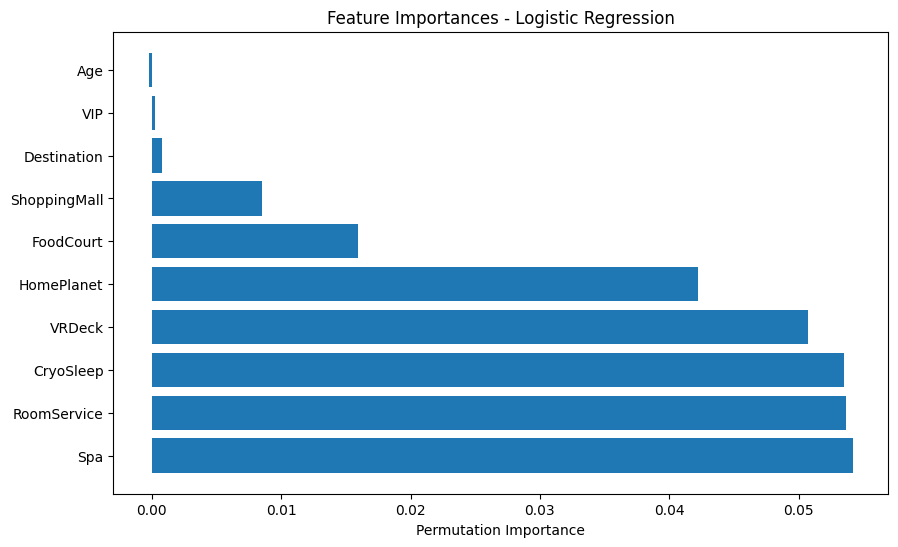

In [ ]:
plot_permutation_importance(logistic_pipeline, X_train, y_train, df_train,'Feature Importances - Logistic Regression')

## 2. SVM

Classification Report for SVM (Train Data):
              precision    recall  f1-score   support

       False       0.80      0.79      0.79      4315
        True       0.79      0.80      0.80      4378

    accuracy                           0.80      8693
   macro avg       0.80      0.80      0.80      8693
weighted avg       0.80      0.80      0.80      8693



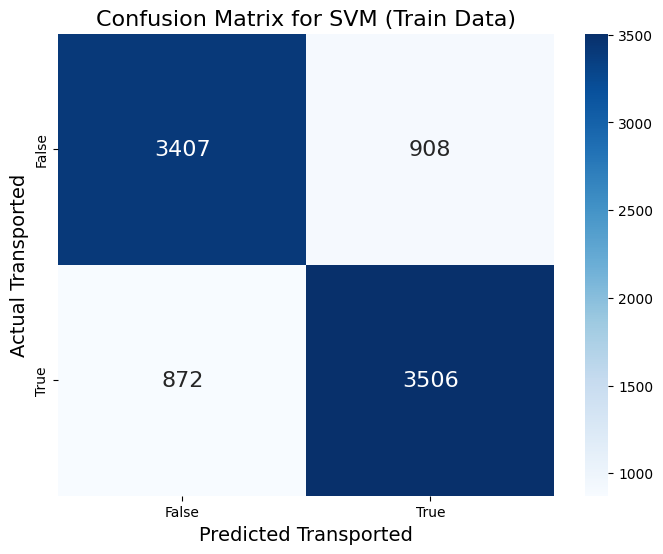

In [ ]:
# Define the SVM model
svm_model = SVC()

# Create a pipeline for SVM including preprocessing and the model
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', svm_model)
])

# Fit the SVM model on the training data
svm_pipeline.fit(X_train, y_train)

# Predict on the training set and evaluate
svm_y_train_pred = svm_pipeline.predict(X_train)

# Evaluate SVM model
evaluate_model("SVM", y_train, svm_y_train_pred, dataset_type="Train")

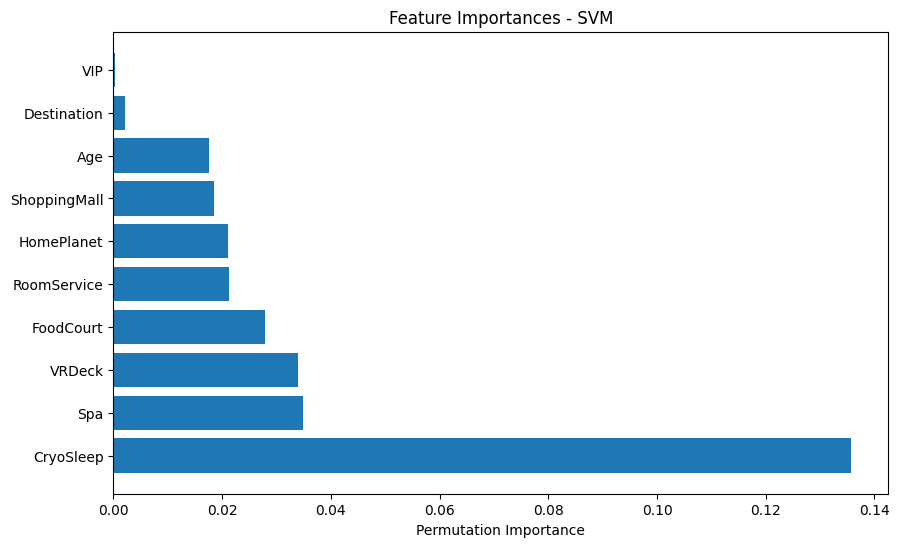

In [ ]:
plot_permutation_importance(svm_pipeline, X_train, y_train, df_train,'Feature Importances - SVM')

## 3. Random Forest

Classification Report for Random Forest (Train Data):
              precision    recall  f1-score   support

       False       0.97      0.90      0.93      4315
        True       0.90      0.97      0.94      4378

    accuracy                           0.93      8693
   macro avg       0.94      0.93      0.93      8693
weighted avg       0.94      0.93      0.93      8693



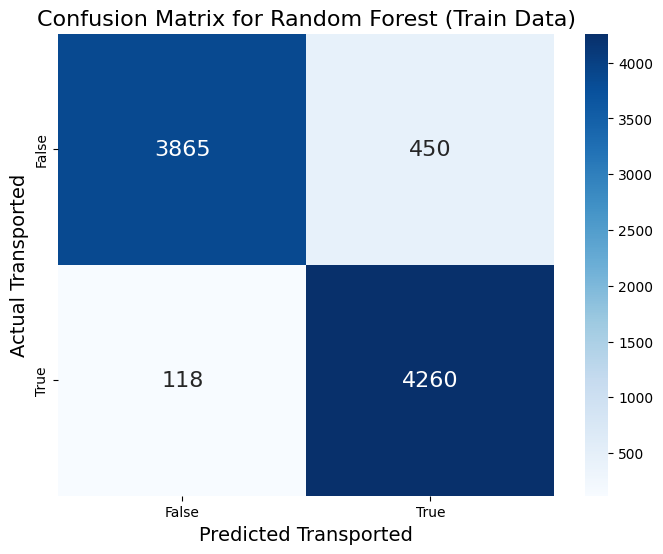

In [ ]:
# Define the model
model = RandomForestClassifier(random_state=42)

# Create a pipeline that includes preprocessing and the model
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the model on the training data
random_forest_pipeline.fit(X_train, y_train)

# Predict on the training set and evaluate
rf_y_train_pred = random_forest_pipeline.predict(X_train)

# Evaluate the model
evaluate_model('Random Forest', y_train, rf_y_train_pred, dataset_type="Train")

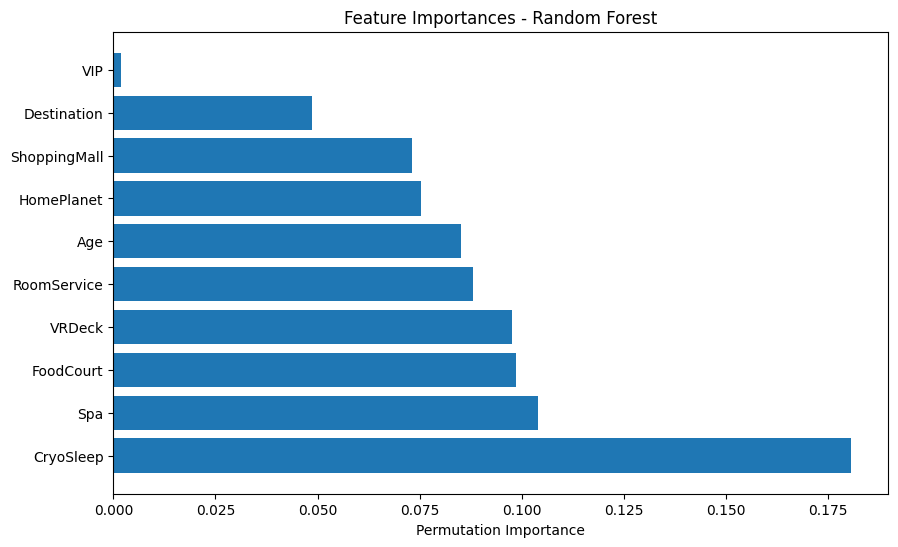

In [ ]:
plot_permutation_importance(random_forest_pipeline, X_train, y_train, df_train,'Feature Importances - Random Forest')

## 4. Gradient Boosting

Classification Report for Gradient Boosting (Train Data):
              precision    recall  f1-score   support

       False       0.84      0.76      0.80      4315
        True       0.78      0.85      0.82      4378

    accuracy                           0.81      8693
   macro avg       0.81      0.81      0.81      8693
weighted avg       0.81      0.81      0.81      8693



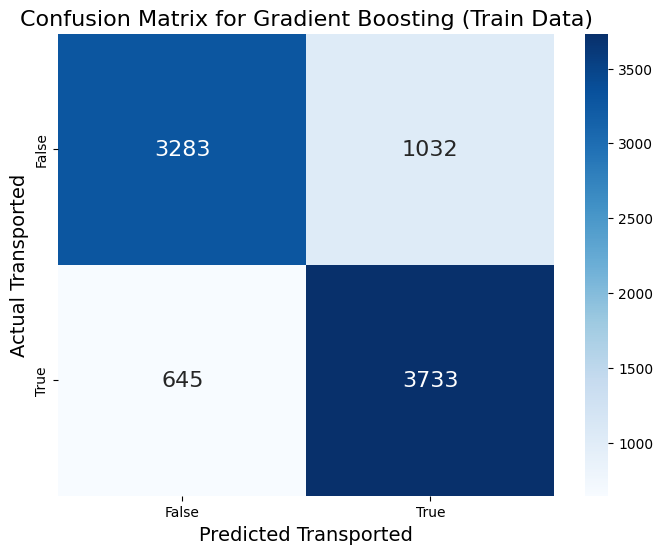

In [ ]:
# Define the model
model = GradientBoostingClassifier(random_state=42)

# Create a pipeline that includes preprocessing and the model
gradient_boosting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the model on the training data
gradient_boosting_pipeline.fit(X_train, y_train)

# Predict on the training set and evaluate
gb_y_train_pred = gradient_boosting_pipeline.predict(X_train)

# Evaluate the model
evaluate_model('Gradient Boosting', y_train, gb_y_train_pred, dataset_type="Train")

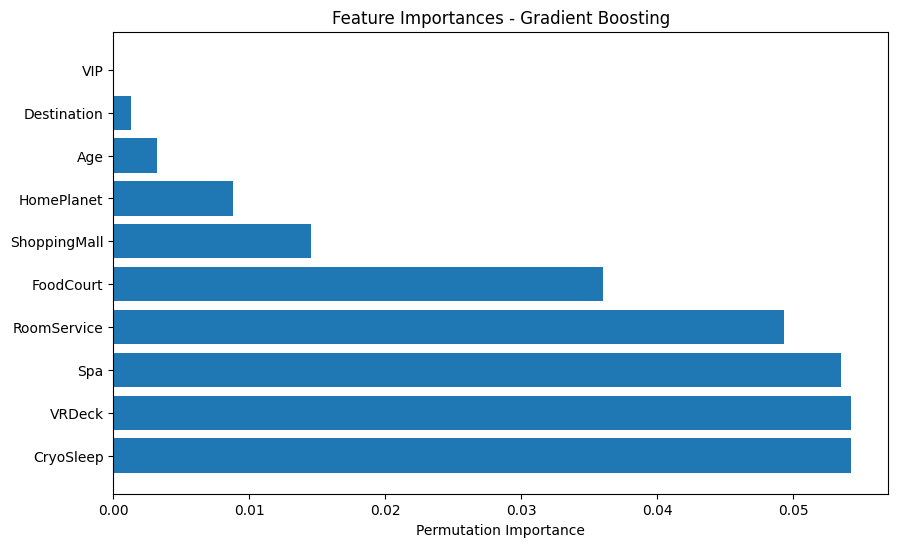

In [ ]:
plot_permutation_importance(gradient_boosting_pipeline, X_train, y_train, df_train,'Feature Importances - Gradient Boosting')

# Predict on test set

In [ ]:
# Predict on the test set
rf_y_test_pred = random_forest_pipeline.predict(X_test)

sample_submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Transported': rf_y_test_pred
})

# Save the predictions to a CSV file
sample_submission.to_csv(path+"sample_submission.csv", index=False)

# Print a sample of the submission
print(sample_submission)

     PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01        False
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01         True
4276     9277_01        False

[4277 rows x 2 columns]
